### Rolling predictions 

Comparing results on scikit tree & forest, prophet, SARIMA and craft on energy time series

We start by feeding the model 2 months of data, and ask them to predict 1 week

In [21]:
import pandas as pd
import numpy as np
import subprocess
import json
import benchmark_tools as abt
import pickle
import matplotlib.pyplot as plt
import itertools

In [2]:
import logging
import warnings
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
data = pd.read_csv('data/ampds_power_30T.csv')
data.index = pd.to_datetime(data.date, unit="s")
data = data.dropna().drop('date',1)
#Adding temperature information
temp = pd.read_csv('data/ampds_temp_30T.csv', parse_dates=['date'])
temp.index = pd.to_datetime(temp.date, unit='s')
temp = temp.drop('date',1)
data = data.merge(temp, left_index=True, right_index=True)
data.index.freq = '30T'

In [4]:
data.index.values[0], data.index.values[-1]

(numpy.datetime64('2012-04-01T07:00:00.000000000'),
 numpy.datetime64('2014-04-01T06:30:00.000000000'))

In [5]:
data.head()

,load,temp
date,,
2012-04-01 07:00:00,1947.400000,4.7
2012-04-01 07:30:00,1269.766667,4.7
2012-04-01 08:00:00,1645.300000,5.3
2012-04-01 08:30:00,845.666667,5.3
2012-04-01 09:00:00,1584.966667,5.9


In [6]:
print('{} semaines dans les données'.format(round((data.index[-1] - data.index[0]).days/7,2)))

104.14 semaines dans les données


Craft ai predictions for week n° 9


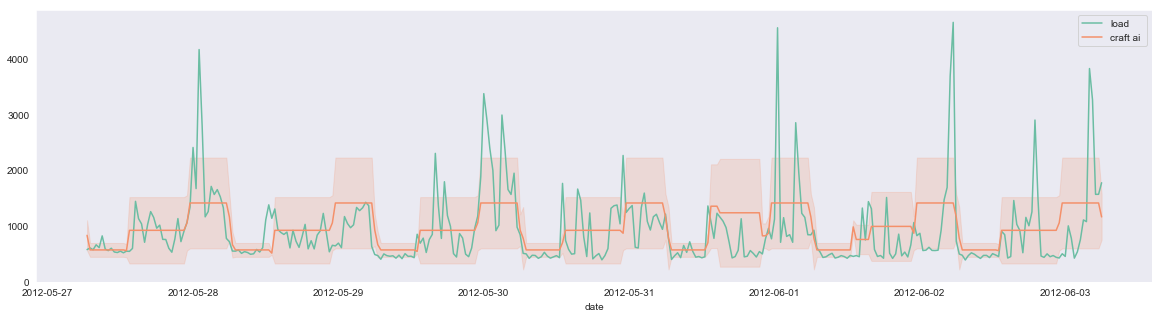

Model predictions for week n° 9


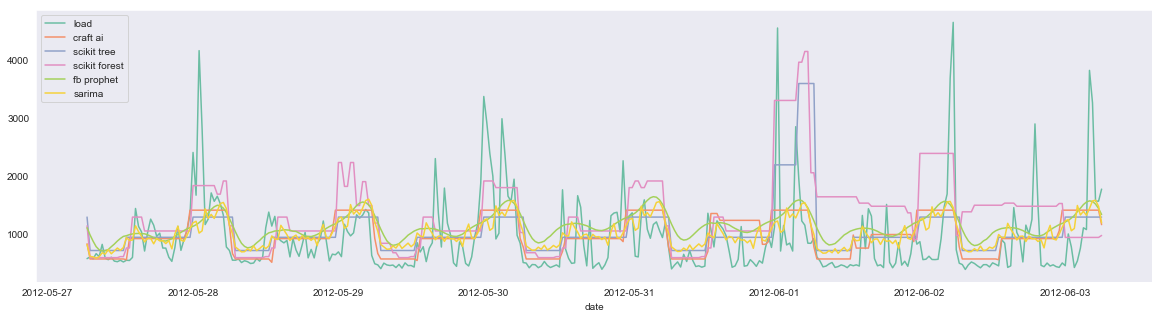

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    447.0  56.16  676.0 -0.060347     9
scikit forest  616.0  88.32  850.0 -0.673876     9
prophet        475.0  67.57  627.0  0.088827     9
sarima model   398.0  51.34  587.0  0.202504     9
craft ai       374.0  45.45  579.0  0.223178     9
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    434.0  43.64  691.0  0.131401    10
scikit forest  443.0  42.37  737.0  0.013209    10
prophet        433.0  44.34  694.0  0.123101    10
sarima model   452.0  48.02  694.0  0.124727    10
craft ai       450.0  45.09  695.0  0.121547    10
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    440.0  77.80  514.0 -0.717514    11
scikit forest  387.0  65.76  482.0 -0.510701    11
prophet        453.0  81.52  519.0 -0.755164    11
sarima model   447.0  78.76  51

C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    436.0  56.37  615.0  0.118865    12
scikit forest  406.0  47.94  617.0  0.112375    12
prophet        377.0  35.61  648.0  0.021165    12
sarima model   396.0  47.64  608.0  0.137679    12
craft ai       411.0  51.38  600.0  0.159695    12
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    403.0  40.34  688.0  0.220446    13
scikit forest  447.0  44.86  759.0  0.049849    13
prophet        377.0  29.40  754.0  0.062790    13
sarima model   370.0  32.49  707.0  0.175117    13
craft ai       380.0  35.54  697.0  0.200206    13
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    308.0  39.14  470.0  0.185083    14
scikit forest  334.0  41.16  528.0 -0.026764    14
prophet        389.0  54.74  516.0  0.018682    14
sarima model   300.0  36.76  46

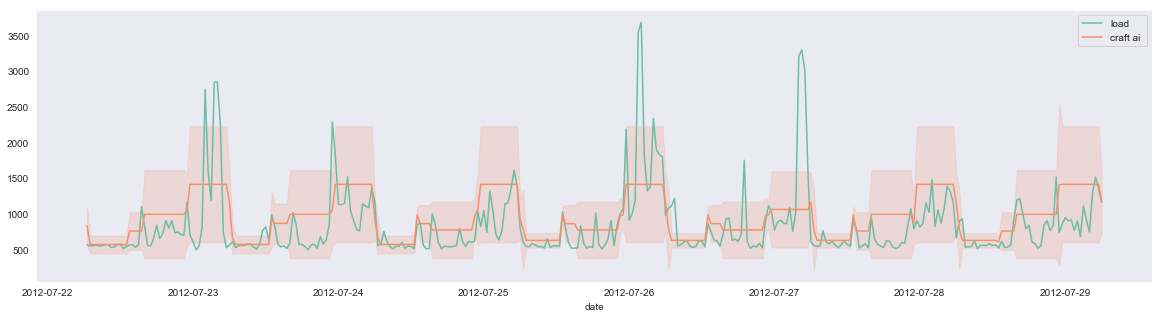

Model predictions for week n° 17


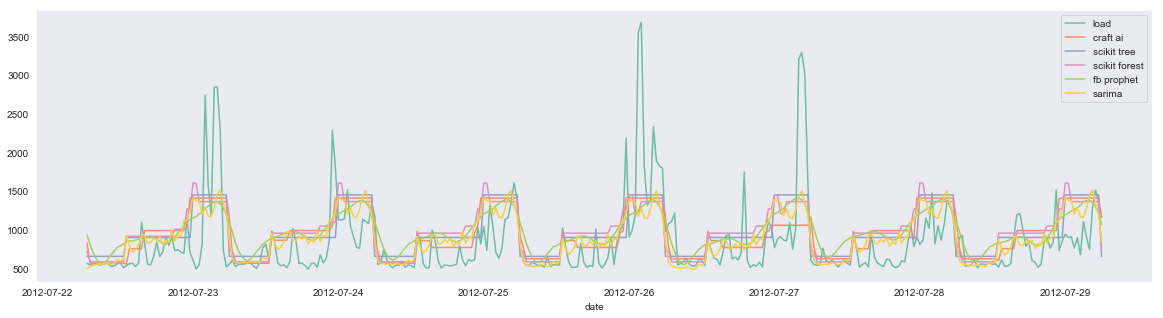

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    300.0  37.18  432.0  0.223659    17
scikit forest  311.0  38.76  451.0  0.151156    17
prophet        298.0  37.98  424.0  0.249515    17
sarima model   255.0  29.55  406.0  0.311725    17
craft ai       278.0  33.41  432.0  0.223433    17
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    333.0  33.04  615.0  0.119331    18
scikit forest  335.0  31.51  658.0 -0.008294    18
prophet        321.0  30.40  607.0  0.141307    18
sarima model   305.0  27.72  606.0  0.144380    18
craft ai       326.0  32.92  606.0  0.144160    18
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    299.0  30.52  431.0  0.332894    19
scikit forest  297.0  30.37  428.0  0.341889    19
prophet        296.0  29.80  432.0  0.329854    19
sarima model   279.0  26.85  41

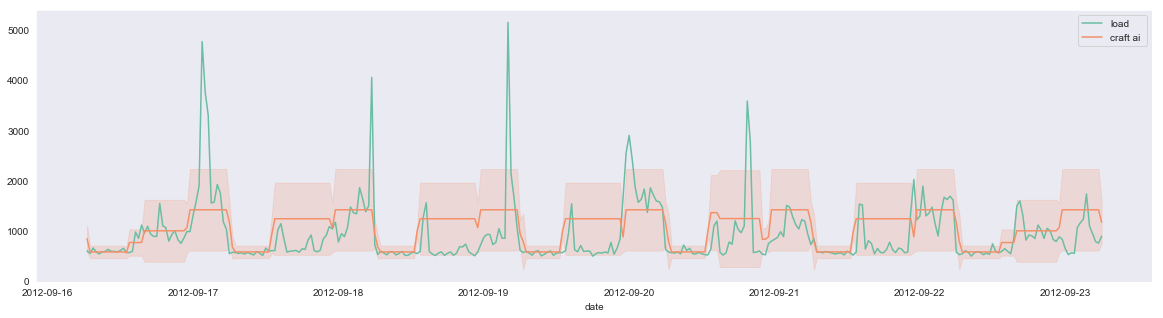

Model predictions for week n° 25


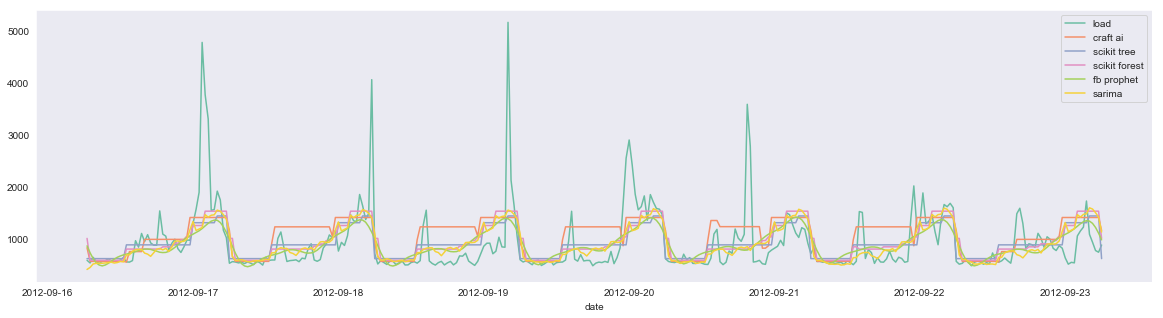

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    282.0  29.83  508.0  0.303597    25
scikit forest  283.0  29.75  506.0  0.307779    25
prophet        288.0  29.38  519.0  0.273556    25
sarima model   268.0  26.74  504.0  0.313225    25
craft ai       357.0  43.10  561.0  0.149613    25
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    310.0  35.05  521.0  0.195071    26
scikit forest  301.0  33.03  516.0  0.208600    26
prophet        288.0  30.58  515.0  0.213676    26
sarima model   273.0  26.77  513.0  0.217594    26
craft ai       340.0  40.83  545.0  0.117252    26
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    361.0  40.98  560.0  0.156131    27
scikit forest  366.0  42.01  558.0  0.160869    27
prophet        319.0  32.54  555.0  0.171574    27
sarima model   293.0  27.22  54

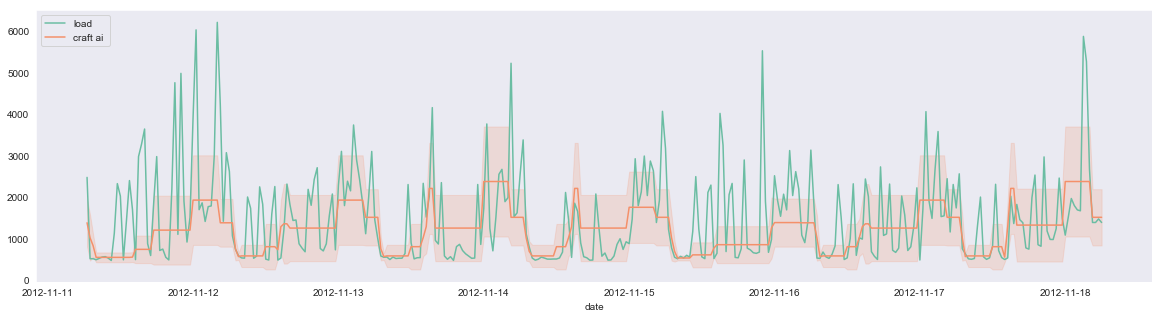

Model predictions for week n° 33


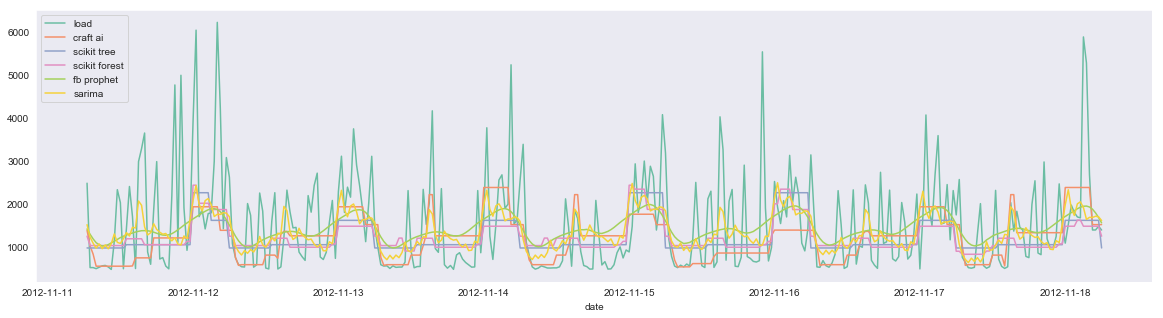

                 mae   mape    rmse        r2  week
ids                                                
scikit tree    722.0  52.35  1040.0  0.085012    33
scikit forest  718.0  52.98  1031.0  0.099754    33
prophet        739.0  65.20   990.0  0.170668    33
sarima model   675.0  53.50   960.0  0.219897    33
craft ai       675.0  44.17  1021.0  0.118317    33


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    748.0  59.64  967.0  0.002033    34
scikit forest  693.0  52.37  915.0  0.105873    34
prophet        726.0  65.41  892.0  0.150688    34
sarima model   678.0  51.10  898.0  0.138563    34
craft ai       678.0  44.09  949.0  0.037150    34
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    628.0  59.50  794.0  0.108761    35
scikit forest  669.0  63.50  828.0  0.029964    35
prophet        720.0  82.71  814.0  0.062277    35
sarima model   653.0  66.05  798.0  0.099708    35
craft ai       572.0  49.72  793.0  0.110749    35


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape    rmse        r2  week
ids                                                
scikit tree    724.0  51.38  1007.0  0.033318    36
scikit forest  704.0  47.39   988.0  0.069134    36
prophet        731.0  61.27   946.0  0.147900    36
sarima model   695.0  50.06   953.0  0.134670    36
craft ai       683.0  40.47   980.0  0.084234    36


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae    mape   rmse        r2  week
ids                                                
scikit tree    592.0   69.85  706.0  0.107441    37
scikit forest  881.0  116.18  956.0 -0.637758    37
prophet        731.0   93.39  825.0 -0.219449    37
sarima model   625.0   74.90  751.0 -0.010168    37
craft ai       432.0   41.77  661.0  0.217597    37


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    603.0  60.23  863.0  0.142568    38
scikit forest  547.0  52.11  837.0  0.192709    38
prophet        624.0  67.58  862.0  0.144481    38
sarima model   587.0  58.83  860.0  0.149211    38
craft ai       496.0  39.27  860.0  0.148773    38
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    614.0  68.49  786.0  0.133092    39
scikit forest  563.0  59.88  757.0  0.195683    39
prophet        615.0  71.63  780.0  0.145668    39
sarima model   553.0  60.42  744.0  0.222103    39
craft ai       525.0  54.03  768.0  0.172450    39


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    537.0  50.54  729.0  0.141720    40
scikit forest  517.0  46.30  723.0  0.156449    40
prophet        467.0  44.79  654.0  0.308296    40
sarima model   426.0  36.98  619.0  0.381739    40
craft ai       397.0  29.57  642.0  0.334358    40
Craft ai predictions for week n° 41


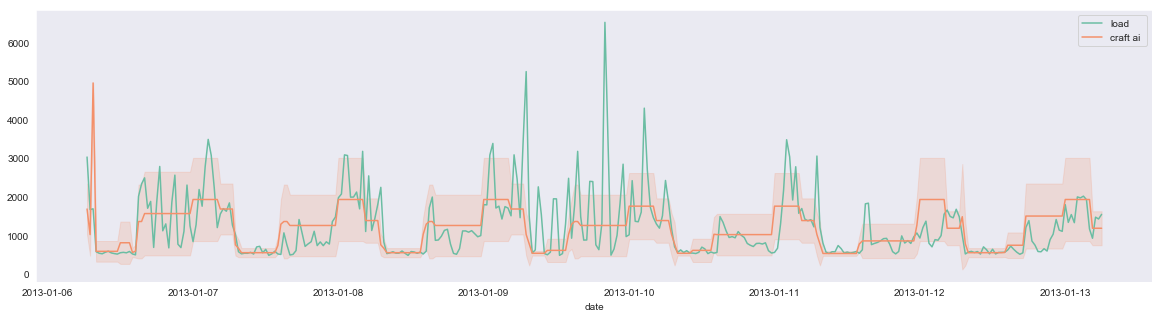

Model predictions for week n° 41


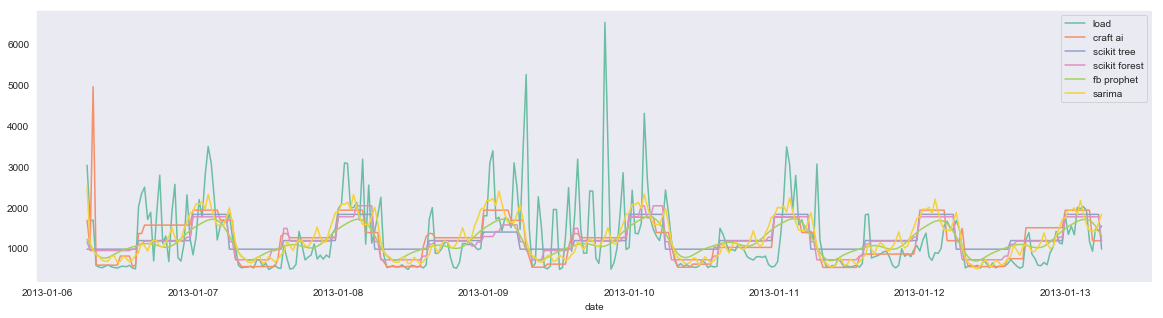

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    540.0  52.27  751.0  0.162248    41
scikit forest  484.0  42.54  729.0  0.211547    41
prophet        470.0  41.88  721.0  0.227774    41
sarima model   437.0  37.70  684.0  0.304983    41
craft ai       429.0  35.00  715.0  0.242286    41
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    479.0  47.63  697.0  0.236098    42
scikit forest  398.0  33.76  665.0  0.303367    42
prophet        410.0  35.25  682.0  0.267837    42
sarima model   360.0  28.68  649.0  0.337504    42
craft ai       372.0  26.52  685.0  0.260643    42
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    572.0  48.82  780.0  0.128277    43
scikit forest  517.0  40.31  768.0  0.155980    43
prophet        524.0  38.07  786.0  0.115310    43
sarima model   516.0  39.84  76

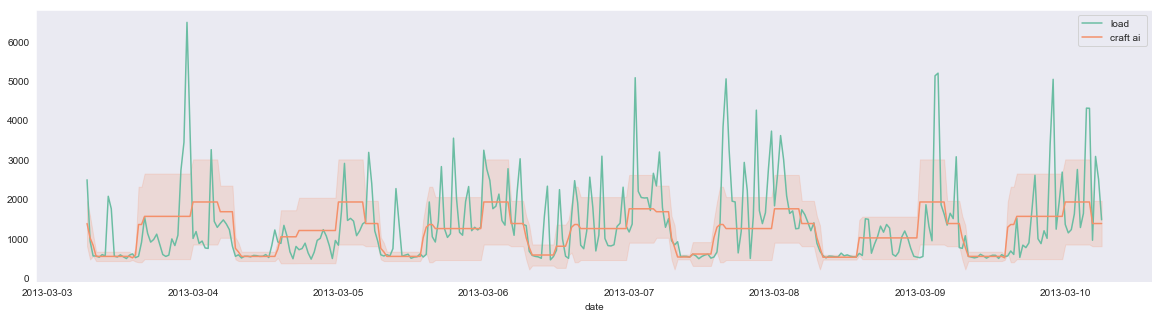

Model predictions for week n° 49


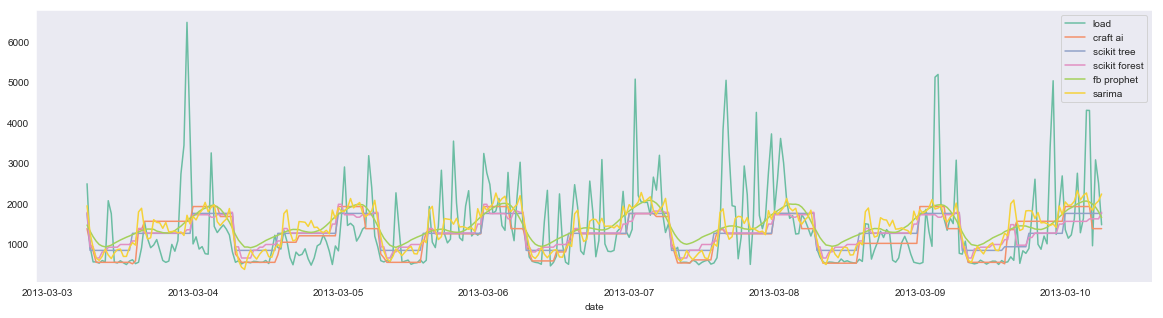

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    579.0  47.51  878.0  0.197348    49
scikit forest  579.0  48.70  876.0  0.200852    49
prophet        648.0  61.71  873.0  0.206194    49
sarima model   592.0  51.05  863.0  0.224523    49
craft ai       531.0  37.86  866.0  0.220078    49
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    580.0  42.18  817.0  0.011810    50
scikit forest  618.0  48.22  829.0 -0.015380    50
prophet        640.0  57.13  796.0  0.064011    50
sarima model   687.0  59.37  863.0 -0.101619    50
craft ai       504.0  33.93  742.0  0.185400    50
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    515.0  50.88  757.0  0.230440    51
scikit forest  540.0  55.52  762.0  0.219013    51
prophet        591.0  64.50  782.0  0.177971    51
sarima model   522.0  51.40  76

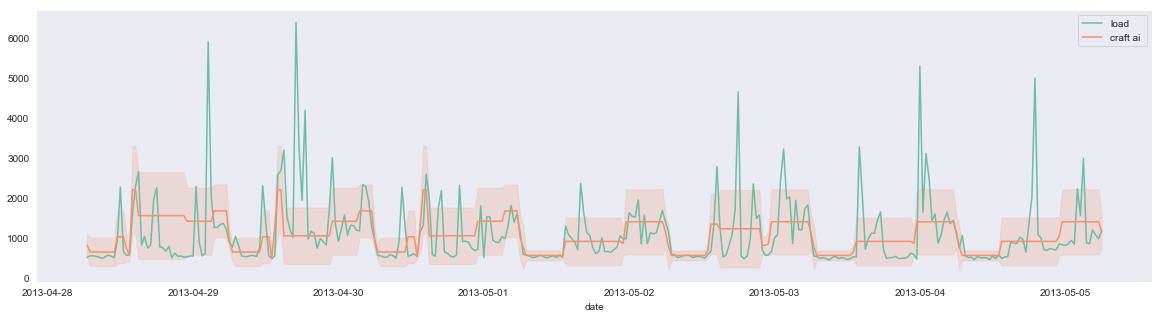

Model predictions for week n° 57


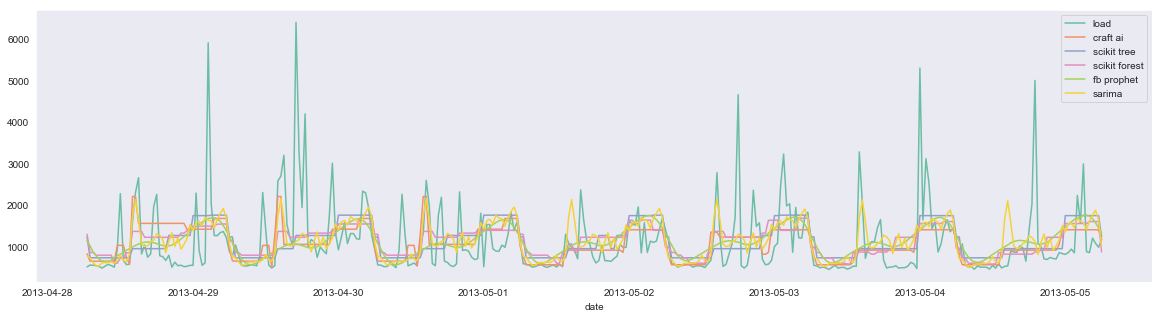

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    511.0  48.13  796.0  0.093161    57
scikit forest  500.0  49.06  780.0  0.128796    57
prophet        498.0  47.42  793.0  0.099891    57
sarima model   454.0  42.71  751.0  0.191031    57
craft ai       436.0  38.86  765.0  0.161678    57


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    357.0  44.44  477.0  0.008540    58
scikit forest  360.0  44.63  486.0 -0.028734    58
prophet        387.0  50.07  491.0 -0.050011    58
sarima model   366.0  45.06  502.0 -0.096022    58
craft ai       276.0  31.51  417.0  0.241613    58
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    352.0  39.03  604.0  0.217148    59
scikit forest  337.0  36.29  596.0  0.237180    59
prophet        336.0  35.84  601.0  0.226395    59
sarima model   358.0  38.70  630.0  0.148245    59
craft ai       318.0  32.97  589.0  0.255160    59
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    399.0  44.11  625.0  0.139847    60
scikit forest  385.0  41.05  623.0  0.144831    60
prophet        347.0  33.36  610.0  0.180836    60
sarima model   355.0  36.95  59

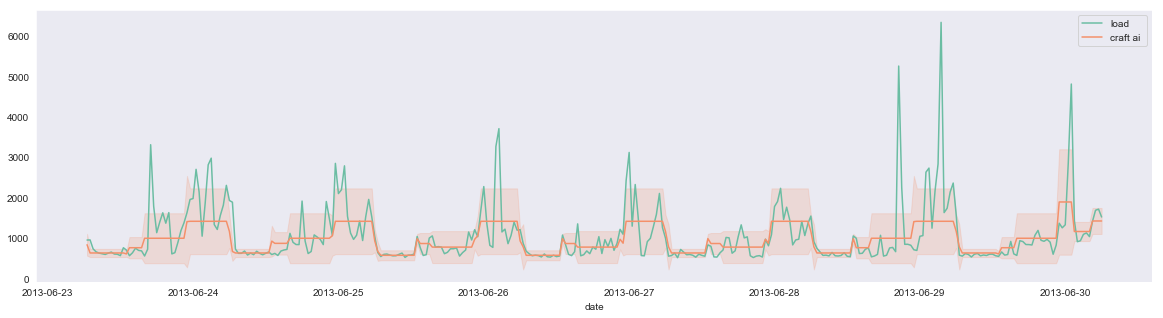

Model predictions for week n° 65


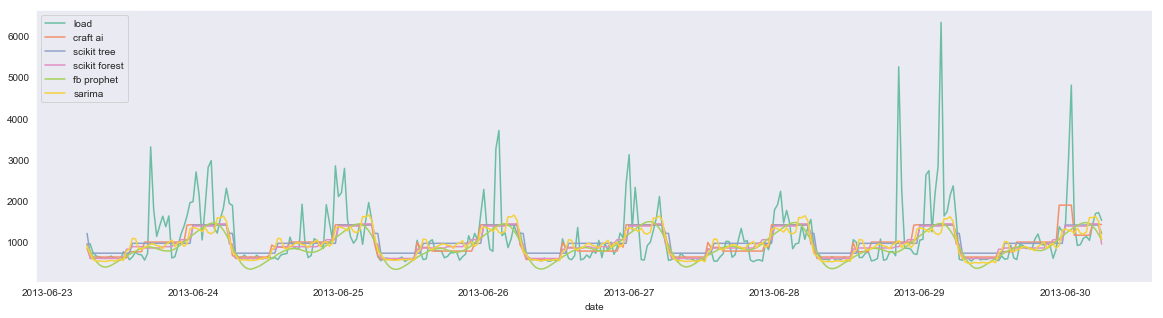

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    352.0  31.49  619.0  0.269377    65
scikit forest  317.0  24.91  616.0  0.277171    65
prophet        344.0  27.48  637.0  0.226692    65
sarima model   332.0  27.04  629.0  0.246301    65
craft ai       303.0  23.92  589.0  0.339346    65
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    376.0  32.38  667.0  0.165471    66
scikit forest  333.0  25.60  641.0  0.229733    66
prophet        362.0  28.65  669.0  0.161127    66
sarima model   345.0  27.24  651.0  0.206212    66
craft ai       293.0  25.88  502.0  0.527329    66
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    308.0  30.81  541.0  0.169953    67
scikit forest  275.0  24.81  534.0  0.191702    67
prophet        289.0  26.59  541.0  0.171144    67
sarima model   307.0  29.17  54

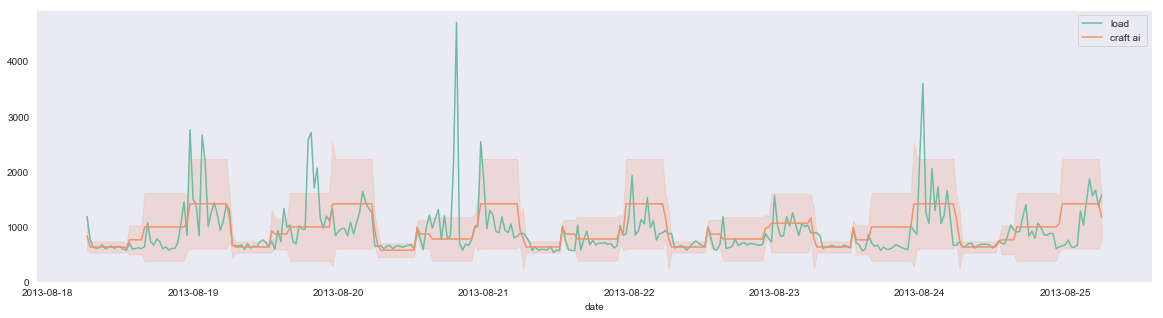

Model predictions for week n° 73


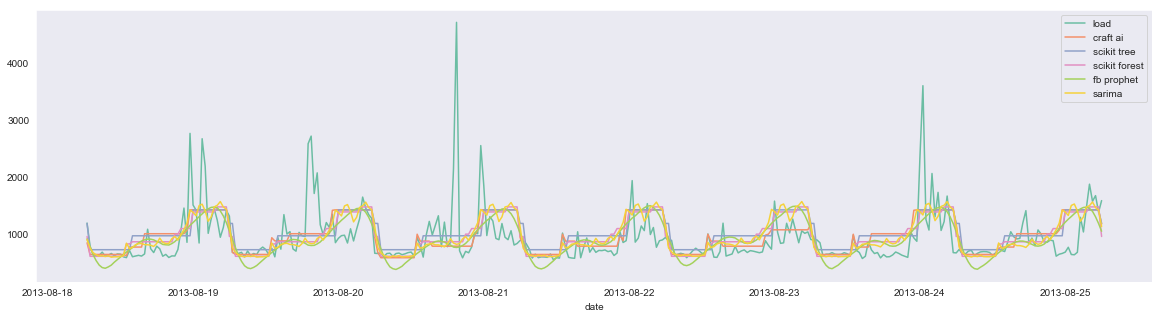

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    272.0  29.77  431.0  0.118195    73
scikit forest  255.0  26.36  428.0  0.131699    73
prophet        266.0  27.81  432.0  0.114421    73
sarima model   254.0  26.03  431.0  0.120308    73
craft ai       236.0  24.40  415.0  0.183042    73
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    329.0  32.58  553.0  0.172541    74
scikit forest  338.0  32.23  567.0  0.129752    74
prophet        349.0  33.06  562.0  0.144295    74
sarima model   327.0  30.05  557.0  0.158600    74
craft ai       327.0  31.41  543.0  0.202493    74
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    312.0  30.02  599.0  0.139571    75
scikit forest  290.0  26.32  589.0  0.168189    75
prophet        316.0  29.47  595.0  0.153157    75
sarima model   289.0  25.88  58

KeyboardInterrupt: 

In [29]:
week_unit = 7*24*2 #nombre de demi-heures dans une semaine
week_index = 8
max_week_index = data.shape[0]/(7*24*2)
#max_week_index =9
idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai']
scores = []
while week_index < max_week_index:
    last_train_index = week_index * week_unit
    last_test_index = (week_index +1) * week_unit
    week_preds = {}
    
    #compute craft ai preds 
    craft_preds = abt.get_craft_preds(stop_train=last_train_index, start_pred=last_train_index, stop_pred=last_test_index, node_file = "load_benchmark_ampds_depth7")
    crp = craft_preds['predictedLoad']
    week_preds['craft ai'] = crp
    
    #compute and store other models' preds  
    data_train, data_test = abt.split_data(data, last_train_index-1 , last_test_index-1)
    
    sk_tree_preds = abt.get_scikit_preds(data_train, data_test)
    week_preds['scikit tree'] = sk_tree_preds
    
    forest_preds = abt.get_forest_preds(data_train, data_test)
    week_preds['scikit forest'] = forest_preds
    
    prophet_preds = abt.get_prophet_preds(data_train, data_test)
    week_preds['fb prophet'] = prophet_preds
    try:
        sarima_preds = abt.get_sarima_preds(data_train, data_test,week_unit, max_feed=3000)
        week_preds['sarima'] = sarima_preds
    except MemoryError:
        print("Memory error for sarima preds on week", week_index)
        sarima_preds = []
        continue
        
    #get scores for the current week
    frame = abt.get_models_scores(data_test=data_test,
                      predictions=[sk_tree_preds, forest_preds, prophet_preds, sarima_preds, crp], 
                      idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai'])
    frame['week'] = week_index +1 
    scores.append(frame)
    
    with open('scores.pickle', 'wb') as f:
        # Pickle the score array so that we can retrieve the scores if the prog fails
        pickle.dump(scores, f, pickle.HIGHEST_PROTOCOL)
    
    #once in a while, print our predictions to see how they compare to each other and to the real values
    if (week_index%8 ==0):
        std = craft_preds['standardDeviation']
        
        print("Craft ai predictions for week n° {}".format(week_index+1))
        abt.plot_period_predictions(data_test.drop('temp',1), 
                                        predictions = {'craft ai ':crp}, 
                                        standardDev = True,
                                        low_val = crp - std,
                                        upper_val = crp + std)
        
        print("Model predictions for week n° {}".format(week_index+1))
        abt.plot_period_predictions(data_test=data_test.drop('temp',1),
                                    predictions = week_preds)
    #print scores 
    print(frame)
    #update index
    week_index +=1

In [9]:
with open('scores.pickle', 'rb') as f:
    scores = pickle.load(f)

### Scores finaux 

In [10]:
final_table = scores[0]
for score in scores[1:]:
    final_table = pd.concat([final_table, score],0)

In [11]:
final_table = final_table.reset_index().set_index(['ids', 'week'])

In [12]:
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
craft ai,406.089552,37.074179,653.716418,0.181307
prophet,451.611940,45.027313,672.597015,0.137480
sarima model,427.044776,40.712388,658.850746,0.170344
scikit forest,440.970149,42.372836,678.179104,0.120874
scikit tree,446.776119,43.283582,675.910448,0.134382


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    301.0  31.31  469.0  0.111635    76
scikit forest  283.0  27.74  468.0  0.118296    76
prophet        288.0  28.62  469.0  0.114492    76
sarima model   278.0  26.69  472.0  0.103175    76
craft ai       275.0  27.37  446.0  0.198502    76
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    328.0  31.34  576.0  0.222834    77
scikit forest  301.0  26.21  577.0  0.219917    77
prophet        321.0  28.42  585.0  0.199148    77
sarima model   313.0  26.93  588.0  0.188267    77
craft ai       295.0  26.19  563.0  0.256539    77
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    353.0  33.81  567.0  0.216304    78
scikit forest  352.0  33.96  560.0  0.236928    78
prophet        332.0  28.83  578.0  0.184912    78
sarima model   325.0  28.36  57

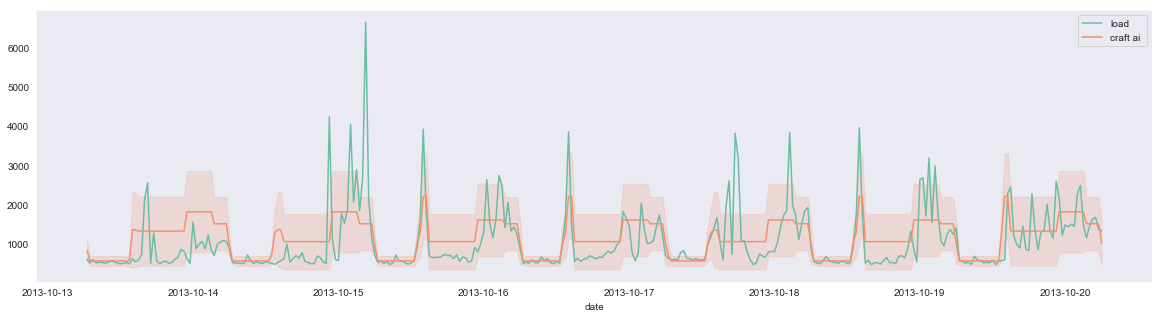

Model predictions for week n° 81


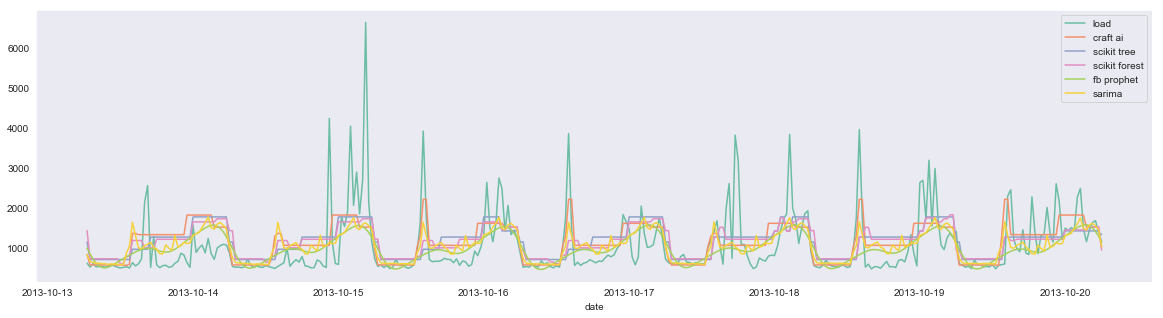

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    483.0  52.45  706.0  0.181323    81
scikit forest  476.0  51.56  697.0  0.201077    81
prophet        405.0  37.17  687.0  0.224414    81
sarima model   397.0  38.66  648.0  0.309585    81
craft ai       411.0  42.96  655.0  0.295258    81
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    451.0  42.98  692.0  0.189715    82
scikit forest  438.0  41.01  683.0  0.211384    82
prophet        381.0  30.31  690.0  0.195109    82
sarima model   349.0  28.05  626.0  0.336803    82
craft ai       360.0  31.96  610.0  0.371513    82
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    525.0  40.49  874.0  0.128435    83
scikit forest  514.0  39.02  866.0  0.144666    83
prophet        482.0  32.50  891.0  0.093909    83
sarima model   448.0  30.01  83

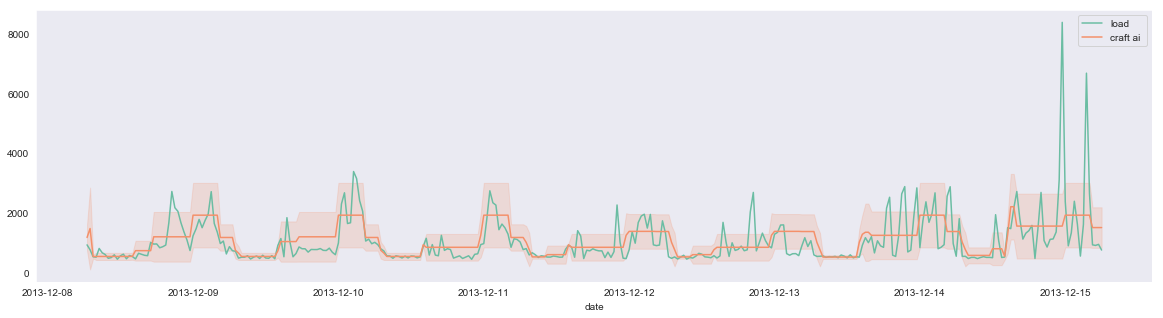

Model predictions for week n° 89


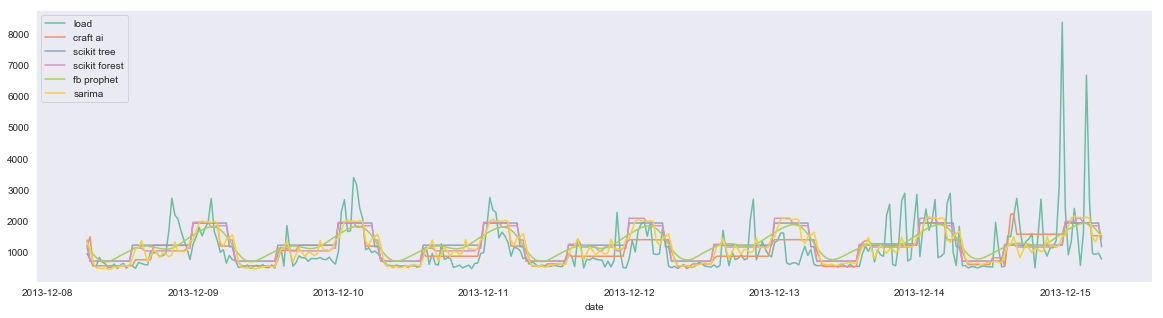

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    481.0  51.79  743.0  0.148881    89
scikit forest  465.0  48.64  739.0  0.158137    89
prophet        500.0  57.28  725.0  0.190496    89
sarima model   414.0  41.59  708.0  0.227571    89
craft ai       373.0  35.21  665.0  0.317681    89


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    535.0  62.64  738.0  0.059553    90
scikit forest  531.0  61.86  733.0  0.073128    90
prophet        561.0  68.98  733.0  0.071973    90
sarima model   473.0  51.68  712.0  0.123741    90
craft ai       456.0  50.03  658.0  0.252739    90


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    544.0  45.02  835.0  0.222551    91
scikit forest  546.0  45.82  830.0  0.232526    91
prophet        570.0  51.68  834.0  0.224134    91
sarima model   513.0  38.29  841.0  0.211298    91
craft ai       486.0  38.45  778.0  0.325271    91


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    608.0  44.60  917.0  0.198549    92
scikit forest  623.0  47.42  921.0  0.191459    92
prophet        641.0  53.42  917.0  0.198421    92
sarima model   563.0  39.50  890.0  0.245224    92
craft ai       566.0  39.80  889.0  0.245901    92
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    549.0  38.80  842.0  0.243034    93
scikit forest  558.0  42.67  816.0  0.289771    93
prophet        596.0  50.54  827.0  0.269350    93
sarima model   546.0  39.85  806.0  0.305938    93
craft ai       495.0  33.61  773.0  0.361702    93
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    514.0  43.46  809.0  0.201053    94
scikit forest  567.0  51.79  821.0  0.177129    94
prophet        611.0  62.57  821.0  0.177006    94
sarima model   559.0  50.47  80

C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Craft ai predictions for week n° 97


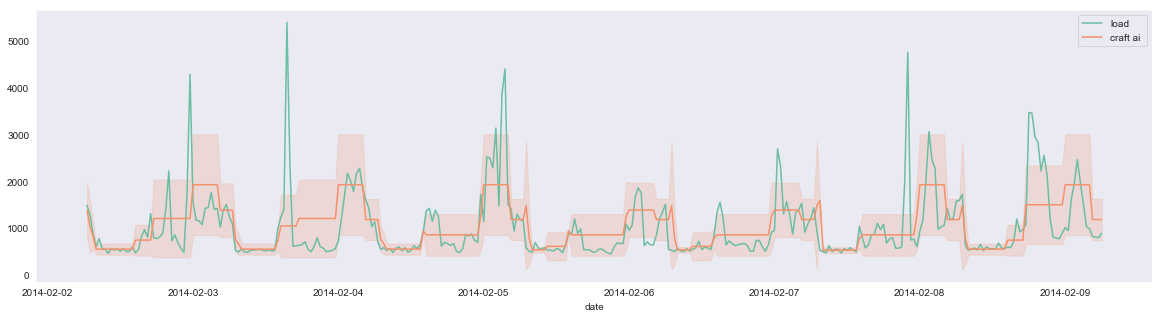

Model predictions for week n° 97


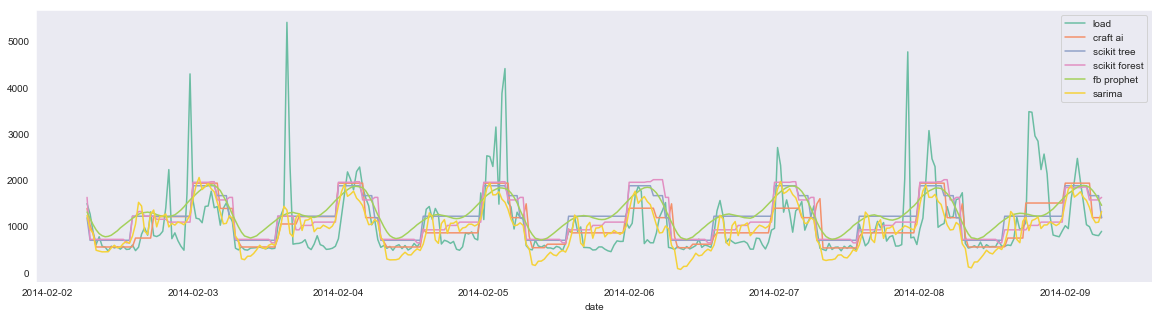

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    456.0  51.51  654.0  0.173193    97
scikit forest  432.0  46.33  651.0  0.180776    97
prophet        511.0  62.01  675.0  0.121022    97
sarima model   391.0  39.81  620.0  0.258197    97
craft ai       350.0  34.34  597.0  0.312164    97
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    490.0  44.35  739.0  0.324042    98
scikit forest  515.0  48.99  745.0  0.314187    98
prophet        562.0  58.57  769.0  0.268098    98
sarima model   521.0  51.85  745.0  0.313069    98
craft ai       475.0  41.12  732.0  0.336799    98
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    486.0  47.86  692.0  0.161565    99
scikit forest  500.0  49.73  704.0  0.132442    99
prophet        544.0  59.52  708.0  0.123372    99
sarima model   482.0  46.34  69

C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    522.0  48.96  721.0  0.133454   102
scikit forest  533.0  52.03  709.0  0.163509   102
prophet        545.0  55.91  707.0  0.166147   102
sarima model   563.0  56.88  729.0  0.113271   102
craft ai       442.0  39.44  641.0  0.315886   102
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    504.0  46.43  733.0  0.220395   103
scikit forest  512.0  49.10  729.0  0.228775   103
prophet        521.0  50.53  737.0  0.211421   103
sarima model   487.0  43.69  736.0  0.214679   103
craft ai       445.0  39.17  692.0  0.305052   103


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    535.0  41.33  830.0  0.152682   104
scikit forest  542.0  43.74  813.0  0.185632   104
prophet        561.0  46.28  827.0  0.158137   104
sarima model   538.0  42.22  819.0  0.174778   104
craft ai       466.0  33.21  766.0  0.276823   104
Craft ai predictions for week n° 105


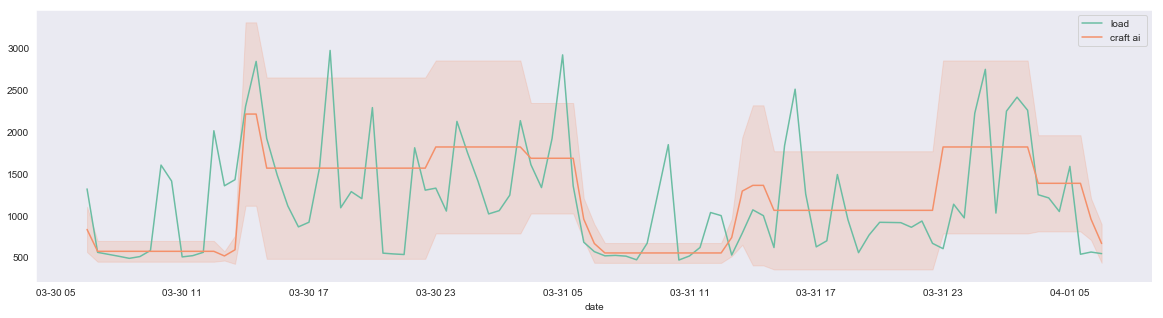

Model predictions for week n° 105


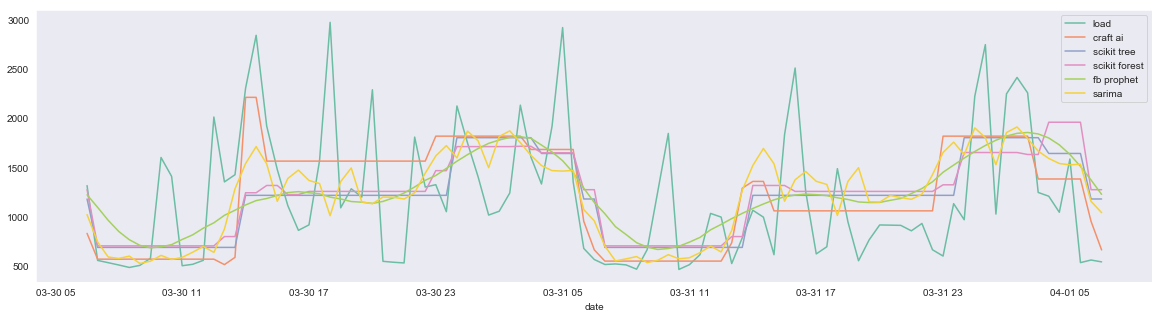

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    456.0  43.67  581.0  0.195732   105
scikit forest  480.0  47.07  601.0  0.138887   105
prophet        480.0  48.56  594.0  0.157693   105
sarima model   470.0  44.89  593.0  0.162623   105
craft ai       436.0  40.72  569.0  0.227787   105


In [14]:
week_unit = 7*24*2 #nombre de demi-heures dans une semaine
week_index = 75
max_week_index = data.shape[0]/(7*24*2)
#max_week_index =9
idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai']
with open('scores.pickle', 'rb') as f:
    scores = pickle.load(f)
while week_index < max_week_index:
    last_train_index = week_index * week_unit
    last_test_index = (week_index +1) * week_unit
    week_preds = {}
    
    #compute craft ai preds 
    craft_preds = abt.get_craft_preds(stop_train=last_train_index, start_pred=last_train_index, stop_pred=last_test_index, node_file = "load_benchmark_ampds_depth7")
    crp = craft_preds['predictedLoad']
    week_preds['craft ai'] = crp
    
    #compute and store other models' preds  
    data_train, data_test = abt.split_data(data, last_train_index-1 , last_test_index-1)
    
    sk_tree_preds = abt.get_scikit_preds(data_train, data_test)
    week_preds['scikit tree'] = sk_tree_preds
    
    forest_preds = abt.get_forest_preds(data_train, data_test)
    week_preds['scikit forest'] = forest_preds
    
    prophet_preds = abt.get_prophet_preds(data_train, data_test)
    week_preds['fb prophet'] = prophet_preds
    try:
        sarima_preds = abt.get_sarima_preds(data_train, data_test,week_unit, max_feed=3000)
        week_preds['sarima'] = sarima_preds
    except MemoryError:
        print("Memory error for sarima preds on week", week_index)
        sarima_preds = []
        continue
        
    #get scores for the current week
    frame = abt.get_models_scores(data_test=data_test,
                      predictions=[sk_tree_preds, forest_preds, prophet_preds, sarima_preds, crp], 
                      idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai'])
    frame['week'] = week_index +1 
    scores.append(frame)
    
    with open('scores.pickle', 'wb') as f:
        # Pickle the score array so that we can retrieve the scores if the prog fails
        pickle.dump(scores, f, pickle.HIGHEST_PROTOCOL)
    
    #once in a while, print our predictions to see how they compare to each other and to the real values
    if (week_index%8 ==0):
        std = craft_preds['standardDeviation']
        
        print("Craft ai predictions for week n° {}".format(week_index+1))
        abt.plot_period_predictions(data_test.drop('temp',1), 
                                        predictions = {'craft ai ':crp}, 
                                        standardDev = True,
                                        low_val = crp - std,
                                        upper_val = crp + std)
        
        print("Model predictions for week n° {}".format(week_index+1))
        abt.plot_period_predictions(data_test=data_test.drop('temp',1),
                                    predictions = week_preds)
    #print scores 
    print(frame)
    #update index
    week_index +=1

#### Final Scores

In [17]:
final_table = scores[0]
for score in scores[1:]:
    final_table = pd.concat([final_table, score],0)
final_table = final_table.reset_index().set_index(['ids', 'week'])
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
craft ai,412.938144,37.125052,661.206186,0.217005
prophet,465.639175,45.927423,690.309278,0.152555
sarima model,436.969072,40.741340,675.958763,0.185501
scikit forest,454.690722,43.258969,691.278351,0.147268
scikit tree,458.783505,43.841031,690.927835,0.154164


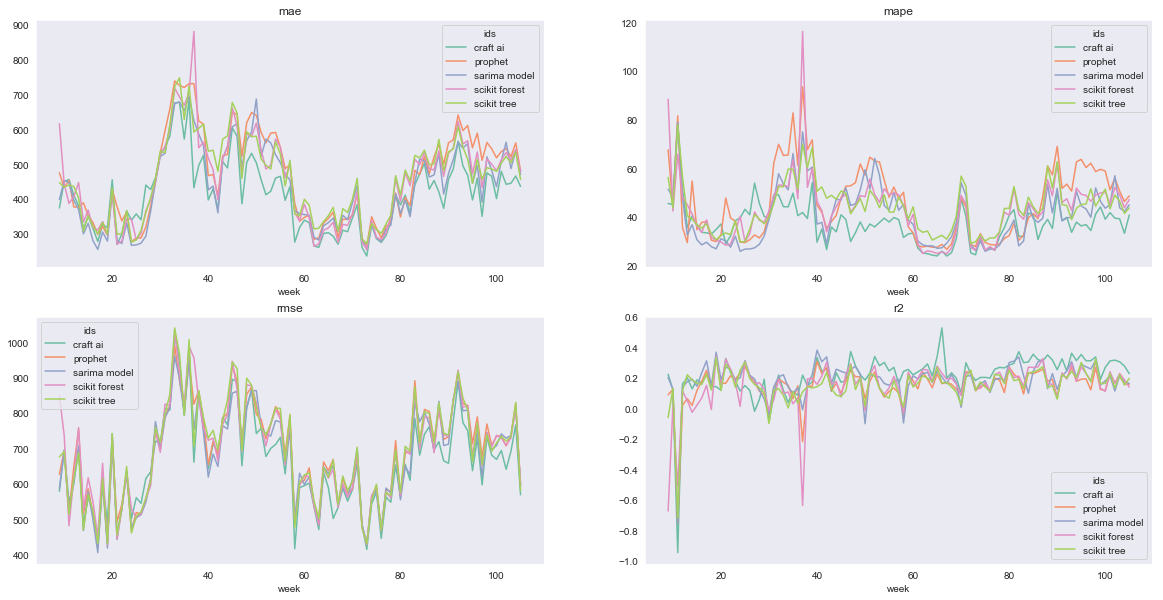

In [24]:
#printing the results 
fig, axes = plt.subplots(2,2, figsize=(20,10))
indexes = list(itertools.product(np.arange(0,2), np.arange(0,2)))
for i,metric in enumerate(final_table.columns):
    final_table.unstack()[metric].T.plot(ax = axes[indexes[i]])
    axes[indexes[i]].set_title(metric)
plt.show()